- Augusto Luchesi Matos, RA: 740871
- Carlos Eduardo Nascimento dos Santos, RA: 791029
- Gabriel Meirelles Carvalho Orlando, RA: 790728

##Um Pouco Sobre o Conjunto

Importação das bibliotecas necessárias

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

Importando o conjunto de dados do Kaggle

Link: https://www.kaggle.com/datasets/muratkokludataset/dry-bean-dataset

In [ ]:
from pandas.io.excel import read_excel
df = read_excel('/content/Dry_Bean_Dataset.xlsx')

Exibindo os atributos do conjunto de dados

In [ ]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
df['Area'].isna().sum()

0

## Função Auxiliar

In [ ]:
def smrr(df):
  print(f"A media do atributo é: {df.mean():.2f}")
  print(f"O desvio padrão do atributo é {df.std():.3f}")
  print(f"O valor máximo do atributo é {df.max():.2f}")
  print(f"O valor mínimo do atributo é {df.min():.2f}")
  nulos = df.isna().sum()
  if nulos == 0:
    print("O atributo não tem nenhum valor nulo")
  else:
    print(f"O atributo tem {nulos} valor(es) nulo(s)")


##Área

- Atributo Númerico Discreto
- A área de uma zona de feijão e o número de pixels dentro de seus limites.
- Este atributo não possui nenhum valor nulo.

A media do atributo é: 53048.28
O desvio padrão do atributo é 29324.096
O valor máximo do atributo é 254616.00
O valor mínimo do atributo é 20420.00
O atributo não tem nenhum valor nulo


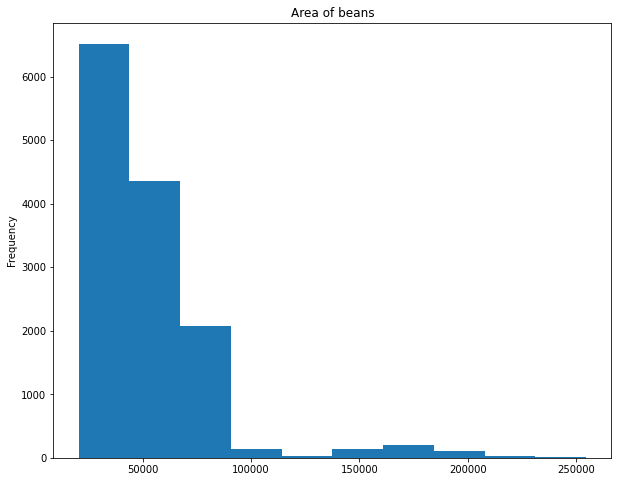

In [ ]:
smrr(df['Area'])
df['Area'].isna().sum()
df['Area'].plot.hist(figsize=(10, 8),title='Area of beans',fontsize=10)

##Perímetro (P):

- Atributo Numérico Continuo
- A circunferência do feijão é definida como o comprimento de sua borda.
- Este atributo não possui nenhum valor nulo

A media do atributo é: 855.28
O desvio padrão do atributo é 214.290
O valor máximo do atributo é 1985.37
O valor mínimo do atributo é 524.74
O atributo não tem nenhum valor nulo


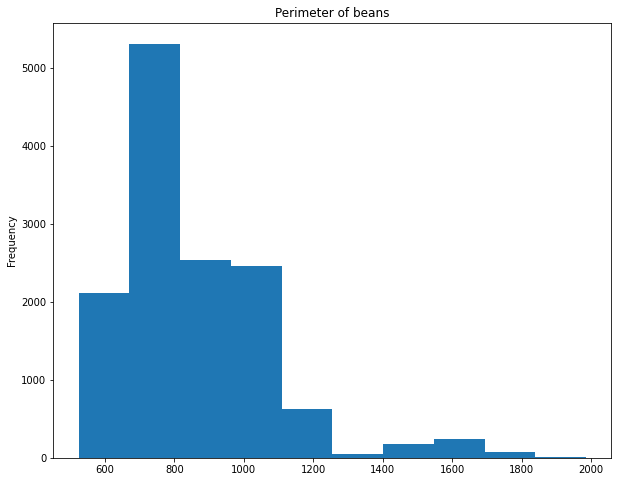

In [ ]:
smrr(df['Perimeter'])
df['Perimeter'].isna().sum()
df['Perimeter'].plot.hist(figsize=(10, 8),title='Perimeter of beans',fontsize=10)

##Comprimento do eixo principal  (L)

- Atributo Numérico Continuo
- A distância entre as extremidades da linha mais longa que pode ser traçada a partir de um feijão.
- Este atributo não possui nenhum valor nulo

A media do atributo é: 320.14
O desvio padrão do atributo é 85.694
O valor máximo do atributo é 738.86
O valor mínimo do atributo é 183.60
O atributo não tem nenhum valor nulo


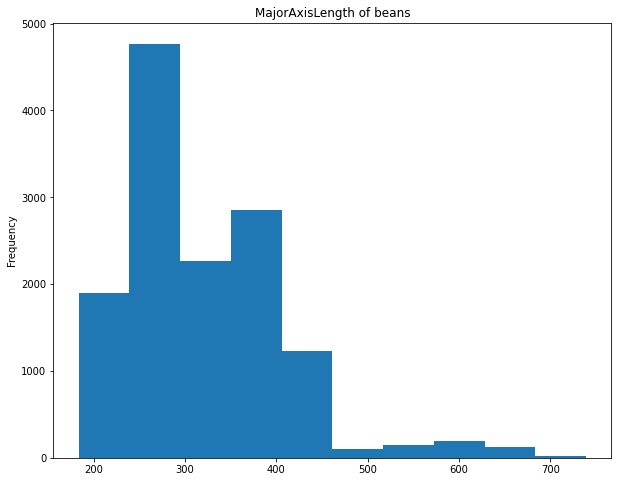

In [ ]:
smrr(df['MajorAxisLength'])
df['MajorAxisLength'].isna().sum()
df['MajorAxisLength'].plot.hist(figsize=(10, 8),title='MajorAxisLength of beans',fontsize=10)

##Comprimento do eixo menor (l):

- Atributo Numérico Continuo
- A linha mais longa que pode ser traçada a partir do feijão estando perpendicular ao eixo principal.
- Este atributo não possui nenhum valor nulo

A media do atributo é: 202.27
O desvio padrão do atributo é 44.970
O valor máximo do atributo é 460.20
O valor mínimo do atributo é 122.51
O atributo não tem nenhum valor nulo


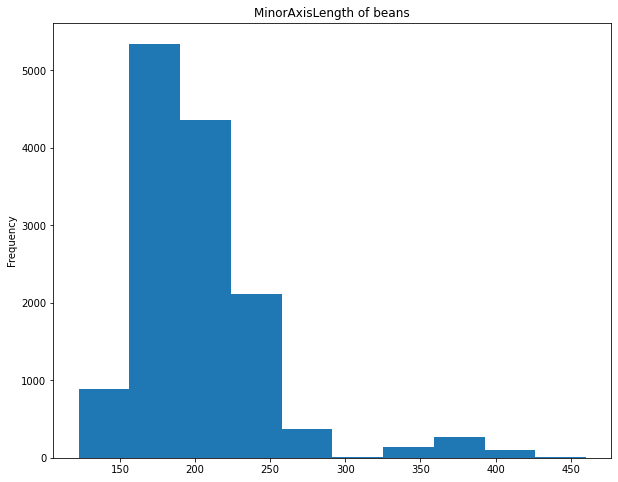

In [ ]:
smrr(df['MinorAxisLength'])
df['MinorAxisLength'].isna().sum()
df['MinorAxisLength'].plot.hist(figsize=(10, 8),title='MinorAxisLength of beans',fontsize=10)

##Proporção (K):

- Atributo Numérico Continuo
- Define a relação entre L e l.
- Este atributo não possui nenhum valor nulo

A media do atributo é: 1.58
O desvio padrão do atributo é 0.247
O valor máximo do atributo é 2.43
O valor mínimo do atributo é 1.02
O atributo não tem nenhum valor nulo


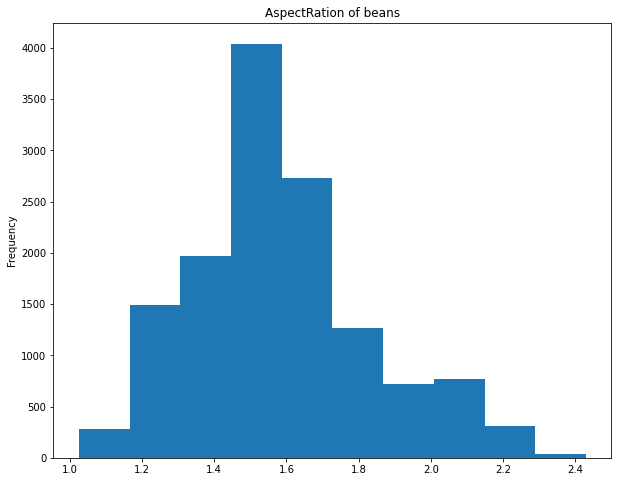

In [ ]:
smrr(df['AspectRation'])
df['AspectRation'].isna().sum()
df['AspectRation'].plot.hist(figsize=(10, 8),title='AspectRation of beans',fontsize=10)

## Excentricidade (Ec):

- Atributo Numerico Continuo
- Excentricidade da elipse tendo os mesmos momentos que a região.
- Este atributo não possui nenhum valor nulo

A media do atributo é: 0.75
O desvio padrão do atributo é 0.092
O valor máximo do atributo é 0.91
O valor mínimo do atributo é 0.22
O atributo não tem nenhum valor nulo


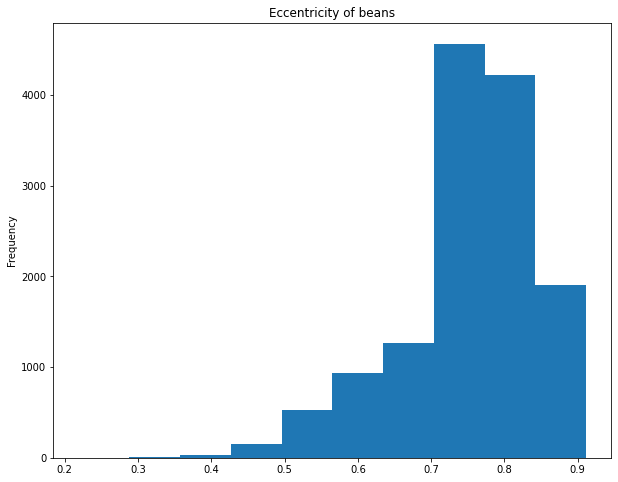

In [ ]:
smrr(df['Eccentricity'])
df['Eccentricity'].isna().sum()
df['Eccentricity'].plot.hist(figsize=(10, 8),title='Eccentricity of beans',fontsize=10)

##Área convexa (C): 

- Atributo Numérico Discreto
- Número de pixels no menor polígono convexo que pode conter a área de uma semente de feijão.
- Este atributo não possui nenhum valor nulo

A media do atributo é: 53768.20
O desvio padrão do atributo é 29774.916
O valor máximo do atributo é 263261.00
O valor mínimo do atributo é 20684.00
O atributo não tem nenhum valor nulo


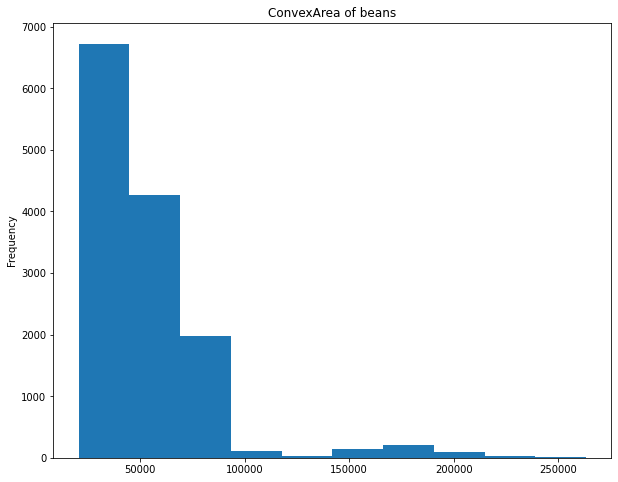

In [ ]:
smrr(df['ConvexArea'])
df['ConvexArea'].isna().sum()
df['ConvexArea'].plot.hist(figsize=(10, 8),title='ConvexArea of beans',fontsize=10)

##Diâmetro equivalente: 

- Atributo Numérico Continuo
- O diâmetro de um círculo com a mesma área de uma semente de feijão.
- Este atributo não possui nenhum valor nulo

A media do atributo é: 253.06
O desvio padrão do atributo é 59.177
O valor máximo do atributo é 569.37
O valor mínimo do atributo é 161.24
O atributo não tem nenhum valor nulo


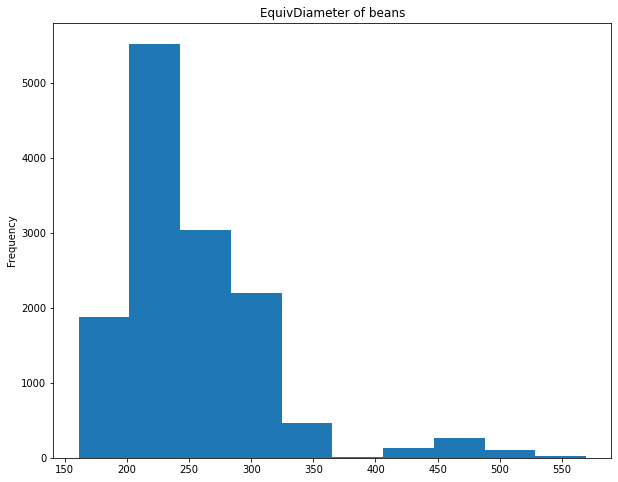

In [ ]:
smrr(df['EquivDiameter'])
df['EquivDiameter'].isna().sum()
df['EquivDiameter'].plot.hist(figsize=(10, 8),title='EquivDiameter of beans',fontsize=10)

## Extensão (Ex):

- Atributo Numérico Continuo
- A proporção dos pixels na caixa delimitadora para a área do feijão.
- Este atributo não possui nenhum valor nulo

A media do atributo é: 0.75
O desvio padrão do atributo é 0.049
O valor máximo do atributo é 0.87
O valor mínimo do atributo é 0.56
O atributo não tem nenhum valor nulo


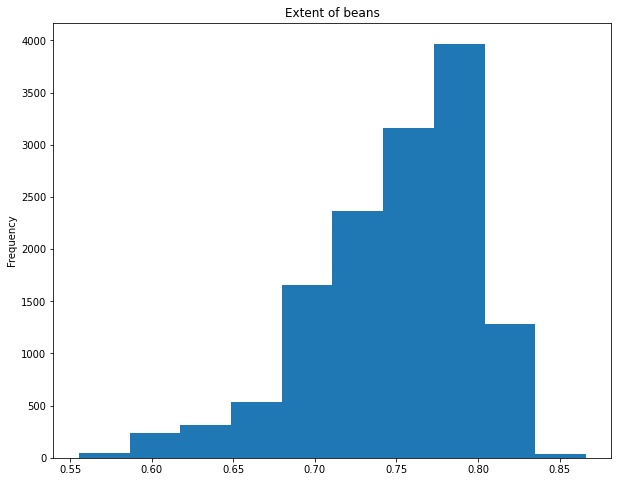

In [ ]:
smrr(df['Extent'])
df['Extent'].isna().sum()
df['Extent'].plot.hist(figsize=(10, 8),title='Extent of beans',fontsize=10)

##Solidez

- Este atributo é um numérico contínuo.
- Este valor representa a solidez do grão de feijão coletado para amostra
- Este atributo não possui nenhum valor nulo

In [ ]:
smrr(df['Solidity'])

A media do atributo é: 0.99
O desvio padrão do atributo é 0.005
O valor máximo do atributo é 0.99
O valor mínimo do atributo é 0.92
O atributo não tem nenhum valor nulo


In [ ]:
df['Solidity'].isna().sum()

0

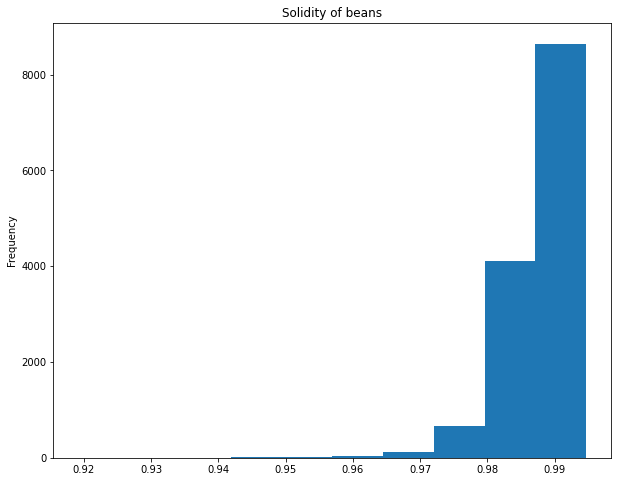

In [ ]:
df['Solidity'].plot.hist(figsize=(10, 8),title='Solidity of beans',fontsize=10)

##Redondeza

- Este atributo é um numérico contínuo.
- Este valor representa o quão redondo é um grão de feijão coletado para amostra
- Este atributo não possui nenhum valor nulo

In [ ]:
smrr(df['roundness'])

A media do atributo é: 0.87
O desvio padrão do atributo é 0.060
O valor máximo do atributo é 0.99
O valor mínimo do atributo é 0.49
O atributo não tem nenhum valor nulo


In [ ]:
df['roundness'].isna().sum()

0

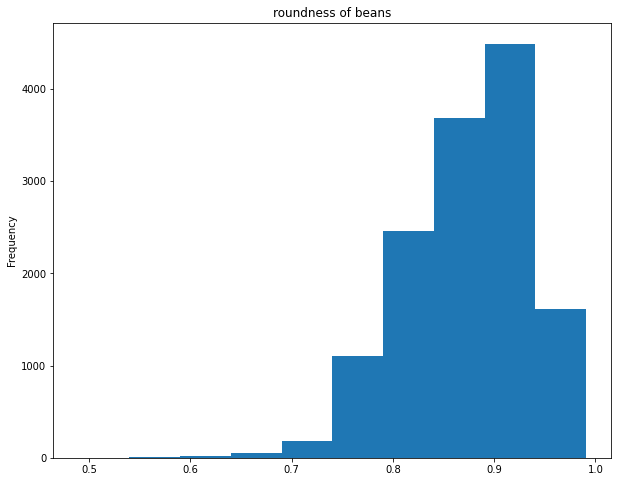

In [ ]:
df['roundness'].plot.hist(figsize=(10, 8),title='roundness of beans',fontsize=10)

##Compactidade

- Este atributo é um numérico contínuo.
- Este valor representa o quão compacto o grão de feijão coletado para amostra é
- Este atributo não possui nenhum valor nulo

In [ ]:
smrr(df['Compactness'])

A media do atributo é: 0.80
O desvio padrão do atributo é 0.062
O valor máximo do atributo é 0.99
O valor mínimo do atributo é 0.64
O atributo não tem nenhum valor nulo


In [ ]:
df['Compactness'].isna().sum()

0

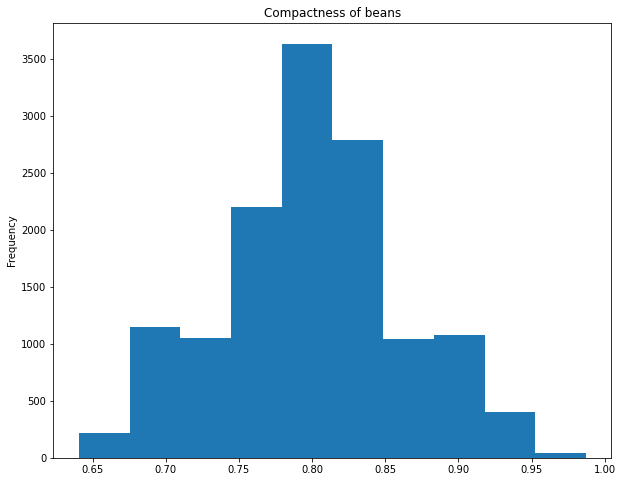

In [ ]:
df['Compactness'].plot.hist(figsize=(10, 8),title='Compactness of beans',fontsize=10)

##Fator de formato 1

- Este atributo é um numérico contínuo.
- Este valor representa uma medida do formato do grão, que é calculada por:

    \begin{align}
        ShapeFactor1 = \frac{MajorAxisLength}{Area}
    \end{align}
- Este atributo não possui nenhum valor nulo

In [ ]:
smrr(df['ShapeFactor1'])

A media do atributo é: 0.01
O desvio padrão do atributo é 0.001
O valor máximo do atributo é 0.01
O valor mínimo do atributo é 0.00
O atributo não tem nenhum valor nulo


In [ ]:
df['ShapeFactor1'].isna().sum()

0

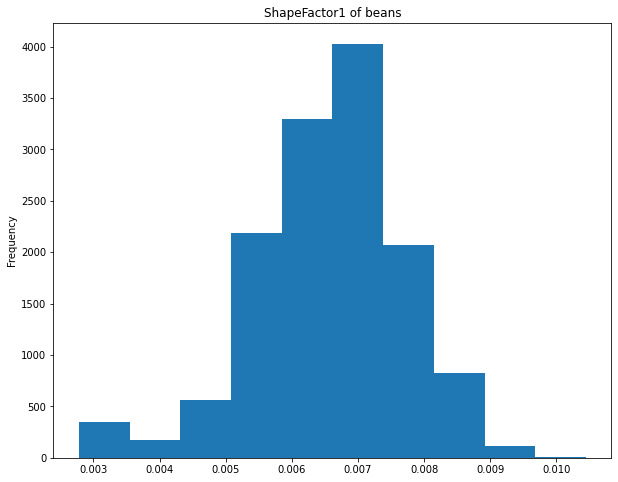

In [ ]:
df['ShapeFactor1'].plot.hist(figsize=(10, 8),title='ShapeFactor1 of beans',fontsize=10)

##Fator de formato 2

- Este atributo é um numérico contínuo.
- Este valor representa uma medida do formato do grão, que é calculada por:

    \begin{align}
        ShapeFactor2 = \frac{MinorAxisLength}{Area}
    \end{align}
- Este atributo não possui nenhum valor nulo

In [ ]:
smrr(df['ShapeFactor2'])

A media do atributo é: 0.00
O desvio padrão do atributo é 0.001
O valor máximo do atributo é 0.00
O valor mínimo do atributo é 0.00
O atributo não tem nenhum valor nulo


In [ ]:
df['ShapeFactor2'].isna().sum()

0

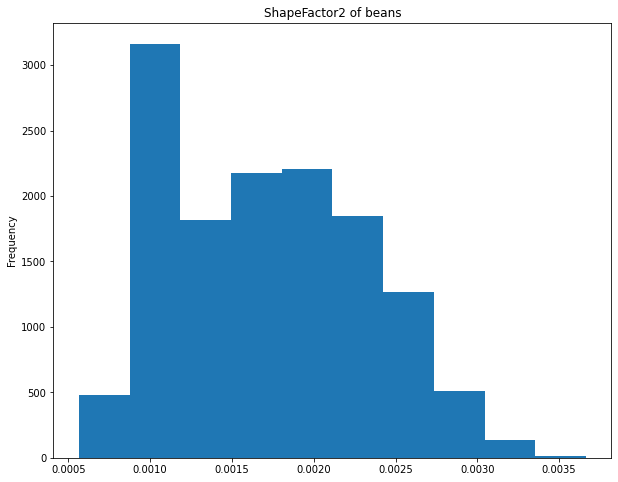

In [ ]:
df['ShapeFactor2'].plot.hist(figsize=(10, 8),title='ShapeFactor2 of beans',fontsize=10)

##Fator de formato 3

- Este atributo é um numérico contínuo.
- Este valor representa uma medida do formato do grão, que é calculada por:

    \begin{align}
        ShapeFactor3 = \frac{Area}{(\frac{MajorAxisLength}{2})^2*\pi}
    \end{align}
- Este atributo não possui nenhum valor nulo

In [ ]:
smrr(df['ShapeFactor3'])

A media do atributo é: 0.64
O desvio padrão do atributo é 0.099
O valor máximo do atributo é 0.97
O valor mínimo do atributo é 0.41
O atributo não tem nenhum valor nulo


In [ ]:
df['ShapeFactor3'].isna().sum()

0

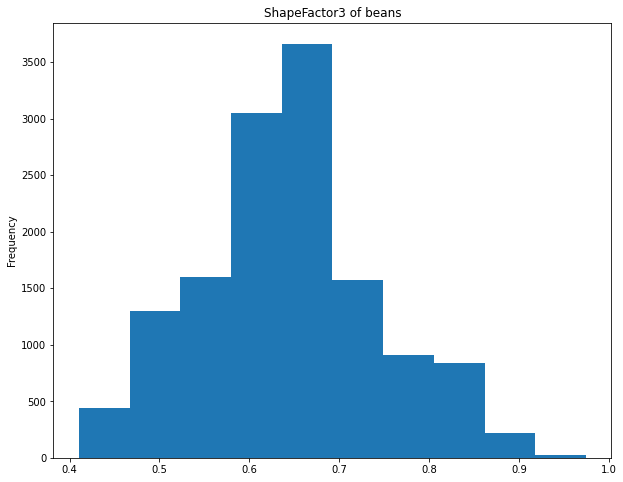

In [ ]:
df['ShapeFactor3'].plot.hist(figsize=(10, 8),title='ShapeFactor3 of beans',fontsize=10)

##Fator de formato 4

- Este atributo é um numérico contínuo.
- Este valor representa uma medida do formato do grão, que é calculada por:

    \begin{align}
        ShapeFactor4 = \frac{Area}{(\frac{MajorAxisLength}{2})*(\frac{MinorAxis Length}{2})*\pi}
    \end{align}
- Este atributo não possui nenhum valor nulo

In [ ]:
smrr(df['ShapeFactor4'])

A media do atributo é: 1.00
O desvio padrão do atributo é 0.004
O valor máximo do atributo é 1.00
O valor mínimo do atributo é 0.95
O atributo não tem nenhum valor nulo


In [ ]:
df['ShapeFactor4'].isna().sum()

0

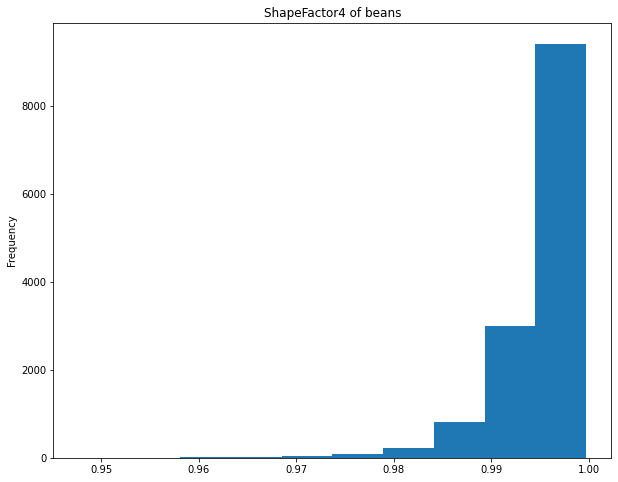

In [ ]:
df['ShapeFactor4'].plot.hist(figsize=(10, 8),title='ShapeFactor4 of beans',fontsize=10)

## Class

- Este atributo é a classe da amostra
- Como estamos lidando com aprendizado não supervisionado, este atributo é inútil para esta tarefa, dessa forma será removido.

In [ ]:
classes = df['Class']
df.drop(['Class'],axis=1,inplace=True)

##Normalização dos dados

- Para evitar que a aplicação de medidas de distância utilizados nos algoritmos de agrupamento escolhidos seja afetado pela grande diferença de escala nos atributos, foi feita uma normalização do conjunto de dados

In [ ]:
df_normalized = StandardScaler().fit_transform(df)
df_old = df
df = df_normalized

## Como será realizado o agrupamento

- Neste projeto, serão testados 3 tipos de algoritmos diferentes de agrupamento.- Para cada algoritmo, diferentes configurações e parâmetros serão utilizados para que haja uma ampla testagem dos métodos de agrupamento
- Entretanto, como se está lidando com um conjunto de dados que contém 16 atributos, é inviável construir um grafo que permita a visualização geral dos dados, já que seria necessário um gráfico com 16 dimensões, o que não é trivial

## PCA

- Para enxergar em 2 dimensões o conjunto escolhido, realizamos um método de redução de dimensionalidade para plotar o gráfico, o PCA.

- O PCA é baseado na variância dos dados, ou seja, ele tenta criar uma nova representação dos dados, com uma dimensão menor, mantendo a variância entre eles.


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)

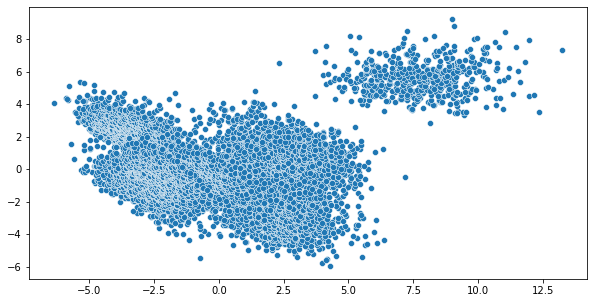

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcs = pca.fit_transform(df)
pc1_values = pcs[:,0]
pc2_values = pcs[:,1]
sns.scatterplot(x=pc1_values,y=pc2_values)

- Nessa etapa, mostra-se que os atributos tem relações entre si e não há nenhum atributo que se sobresaia em relação à outro
- Dessa forma, nenhum atributo poderá ser removido para reduzir a dimensionalidade

In [ ]:
pca = PCA(n_components=16)
pca.fit_transform(df)
pca.explained_variance_ratio_.cumsum()

array([0.55466439, 0.81897412, 0.89903976, 0.95018056, 0.97757349,
       0.9890711 , 0.99604761, 0.99929843, 0.9998147 , 0.99990557,
       0.99997146, 0.99998983, 0.99999913, 0.99999975, 0.99999989,
       1.        ])

## Função de plot

- Para realizar a validação dos resultados iremos utilizar o índice de silhueta e, no final, comparar o score de cada método para decidir qual se encaixa mais com a base de dados escolhida.
- A função abaixo é feita para plotar o gráfico de comparação entre os valores de silhueta alcançados pelos algoritmos, variando de acordo com o seu parâmetro. 

In [ ]:
def plot_sil_score(X,Y,title, x_label):
  plt.plot(X,Y,marker='o',color='black',linestyle='dashed')
  plt.title(title,fontsize=13)
  plt.xlabel(x_label,fontsize=13)
  plt.ylabel('Score Silhueta',fontsize=13)
  plt.show()

##K-Means

In [ ]:
#Importando o Kmeans
from sklearn.cluster import KMeans

- Nessa etapa, o algoritmo do K-Means será testado.
- Ele será utilizado com diversos valores de K possíveis e também terá como algoritmo de inicialização o k-means++

In [ ]:
#Realiza o agrupamento e adiciona cada indice da soma das distancias quadradas na lista
soma_distancias_quadradas = list()
lim_inf = 2
lim_sup = 15
sc0 = []
for i in range(lim_inf, lim_sup+1):
  km = KMeans(n_clusters=i,init='k-means++')
  km = km.fit(df)
  preds = km.fit_predict(df)
  soma_distancias_quadradas.append(km.inertia_)

  score = silhouette_score(df, preds)
  sc0.append(score)
  print(f"Para n_clusters = {i}, o valor do índice de silhueta é  {score}")

Para n_clusters = 2, o valor do índice de silhueta é  0.39665358971827025
Para n_clusters = 3, o valor do índice de silhueta é  0.4047452116044009
Para n_clusters = 4, o valor do índice de silhueta é  0.3416367269676717
Para n_clusters = 5, o valor do índice de silhueta é  0.3568984864249916
Para n_clusters = 6, o valor do índice de silhueta é  0.3602613961119293
Para n_clusters = 7, o valor do índice de silhueta é  0.30938378442134357
Para n_clusters = 8, o valor do índice de silhueta é  0.3031154675254429
Para n_clusters = 9, o valor do índice de silhueta é  0.3032363923896023
Para n_clusters = 10, o valor do índice de silhueta é  0.2899541789288358
Para n_clusters = 11, o valor do índice de silhueta é  0.2694604503076178
Para n_clusters = 12, o valor do índice de silhueta é  0.2631611780206965
Para n_clusters = 13, o valor do índice de silhueta é  0.2507531462802184
Para n_clusters = 14, o valor do índice de silhueta é  0.2642259172180627
Para n_clusters = 15, o valor do índice de s

- 

- Gráfico para ilustar o score do modelo 

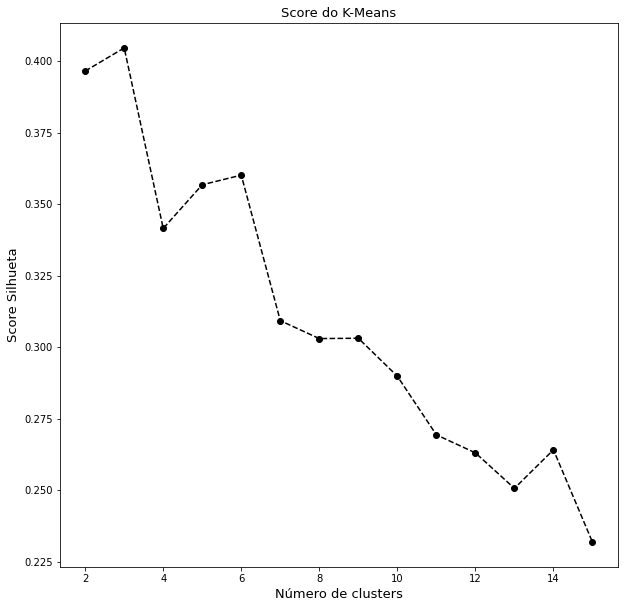

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
plot_sil_score([*range(lim_inf, lim_sup+1, 1)],sc0,'Score do K-Means', 'Número de clusters')

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)


- A seguir, é realizado o método para encontrar um valor de k ideal para o algoritmo
- Este método, consiste em observar onde há a formação de um "joelho" no gráfico
- O ponto X que representa o "joelho" é o número de grupos ideal para o k-means

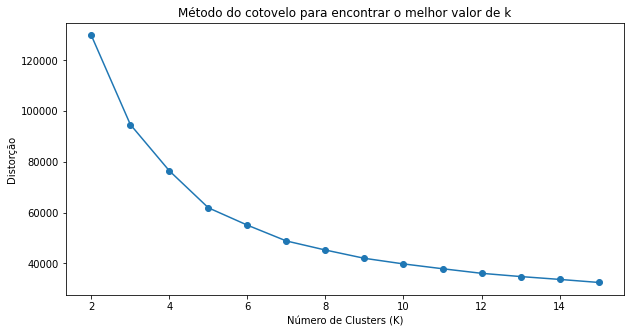

In [ ]:
plt.plot(range(lim_inf,lim_sup+1),soma_distancias_quadradas,marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Distorção')
plt.title('Método do cotovelo para encontrar o melhor valor de k')
plt.show()


In [ ]:
k = 5

In [ ]:
#Pegando os rótulos
km = KMeans(n_clusters=k,init='k-means++')
km = km.fit(df)


- Quantidade de exemplos por grupo

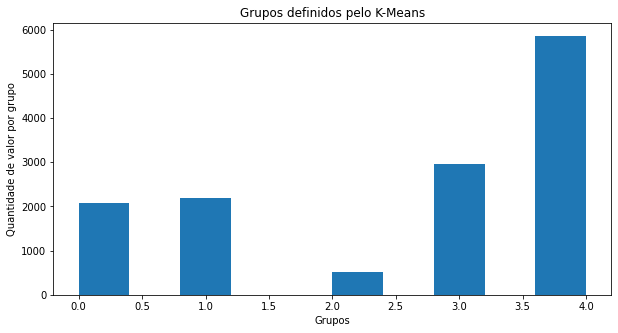

In [ ]:
plt.hist(km.labels_)
plt.title("Grupos definidos pelo K-Means")
plt.xlabel("Grupos")
plt.ylabel("Quantidade de valor por grupo")
plt.show()

## HDBSCAN

In [ ]:
#Baixando a biblioteca por pip
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importando o HDBSCAN
import hdbscan

In [ ]:
plt.rcParams["figure.figsize"] = (50,50)

- Configuração do algoritmo do HDBSAN
- Estes valores representam os tamanhos mínimos que um cluster pode ter

In [ ]:
cluster_size = [30,32,35,37,39]

In [ ]:
#Inicialização do contador
hdb = []
contador = 0

- Roda 5 vezes o modelo do HDBSCAN, com parâmetros diferentes, alternando o número de pontos mínimos no cluster.
- A cada iteração, além de usar o algoritmo do HDBSCAN, cada modelo é testado com o índice de silhueta, e seu resultado é exibido

In [ ]:
sc4 = []
for i in cluster_size:
  hdb.append(hdbscan.HDBSCAN(min_cluster_size=i, metric='euclidean'))
  hdb[contador] = hdb[contador].fit(df)
  hdb_preds = hdb[contador].fit_predict(df)
  score = silhouette_score(df, hdb_preds)
  sc4.append(score)
  print(f"Para n_cluster_size = {i}, o valor do índice de silhueta é  {score}")

  contador += 1 

Para n_cluster_size = 30, o valor do índice de silhueta é  0.5173903153944838
Para n_cluster_size = 32, o valor do índice de silhueta é  0.4781470173999766
Para n_cluster_size = 35, o valor do índice de silhueta é  0.5128968159103771
Para n_cluster_size = 37, o valor do índice de silhueta é  0.5098973175768544
Para n_cluster_size = 39, o valor do índice de silhueta é  0.5104671655360105


- Gráfico para ilustar o score do modelo 

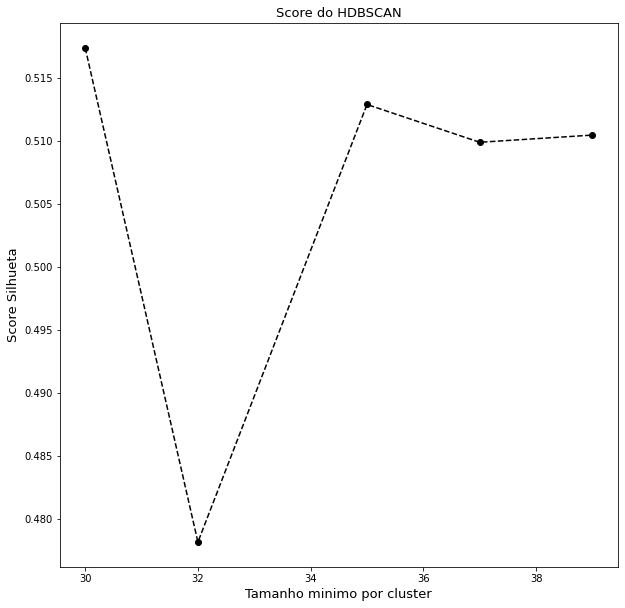

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
plot_sil_score(cluster_size,sc4,'Score do HDBSCAN', 'Tamanho minimo por cluster')

- Função para plotar as árvores de maneira adequada

In [ ]:
def plot_condensed_tree(hdb,min):
  hdb.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
  plt.title(f"Min cluster size igual à {min}",fontsize=20)
  plt.show()


- Árvore referente a primeira configuração

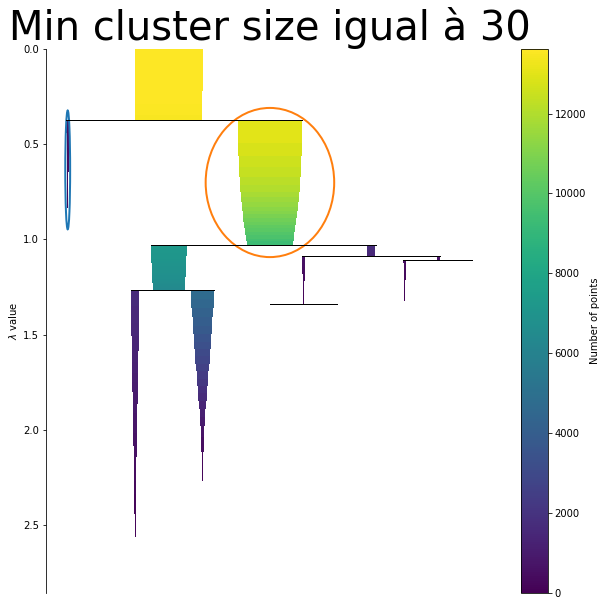

In [ ]:
plot_condensed_tree(hdb[0],cluster_size[0])

- Árvore referente a segunda configuração

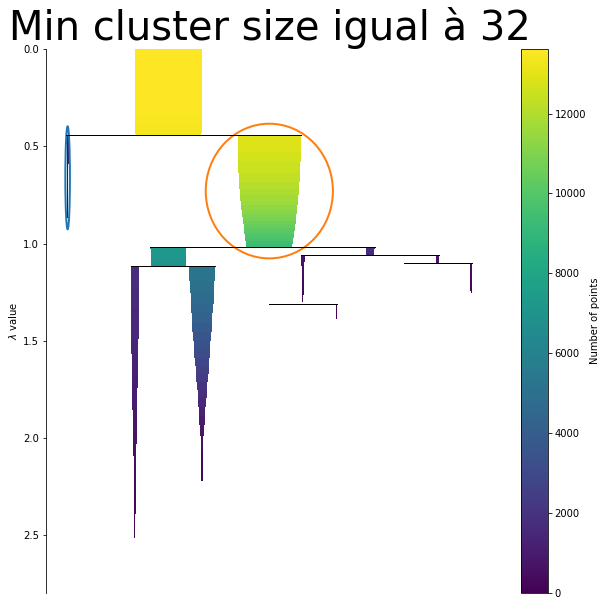

In [ ]:
plot_condensed_tree(hdb[1],cluster_size[1])

- Árvore referente a terceira configuração

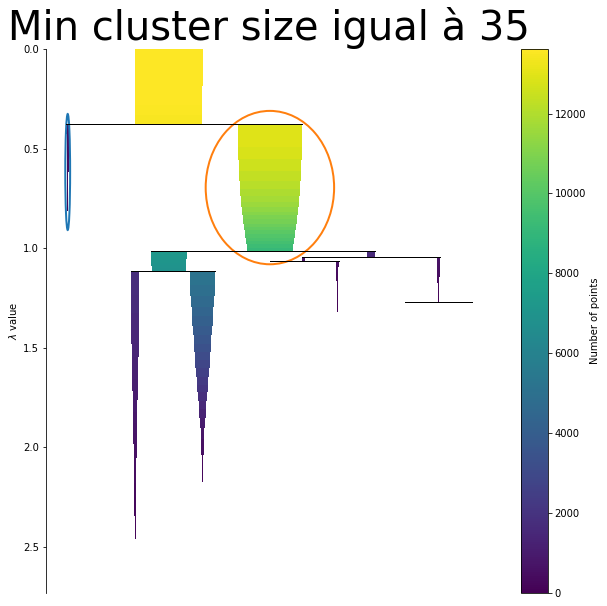

In [ ]:
plot_condensed_tree(hdb[2],cluster_size[2])

- Árvore referente a quarta configuração

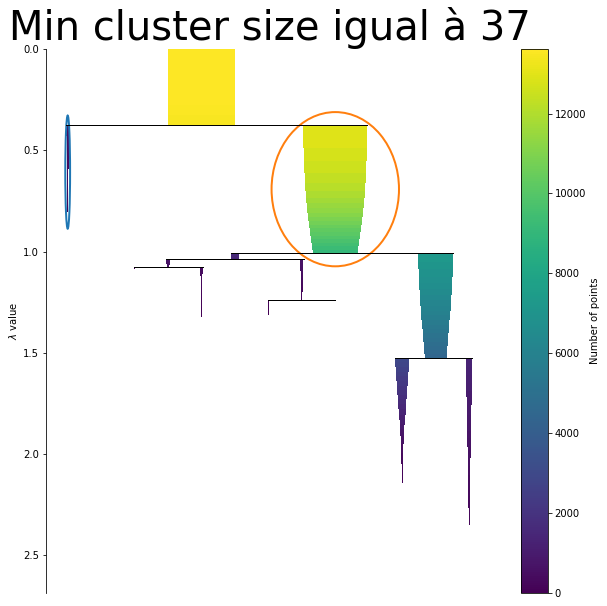

In [ ]:
plot_condensed_tree(hdb[3],cluster_size[3])

- Árvore referente a quinta configuração

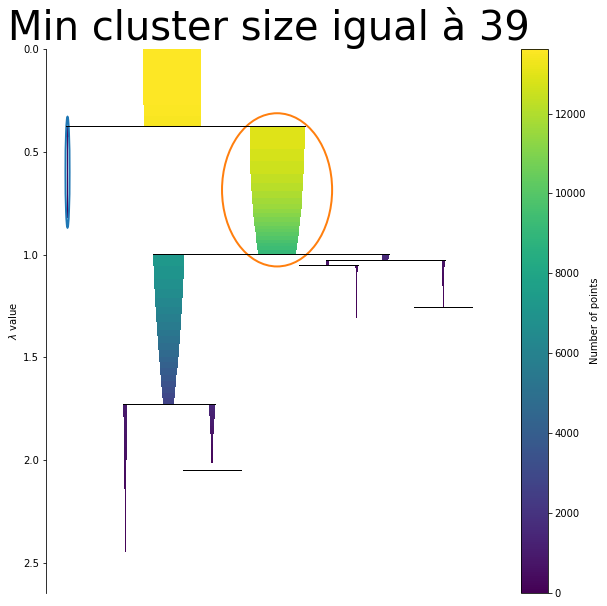

In [ ]:
plot_condensed_tree(hdb[4],cluster_size[4])

## Algoritmo Aglomerativo

- Função para plotar o dendrograma de maneira adequada

In [ ]:
def plot_dendogram(model,linkage_):
  from scipy.cluster.hierarchy import dendrogram,linkage
  X = model.children_
  n = model.n_clusters_
  Z = linkage(X, linkage_)
  dn = dendrogram(Z)
  plt.title(f"Dendograma do algoritmo aglomerativo, com n_cluster = {n} e linkage = {linkage_}",fontsize=50)
  plt.show()



In [ ]:
#Importando o AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

- Nessa etapa, o algoritmo aglomerativo irá ser testado com várias configurações possíveis
- O numero de clusters será testado de 2 à 7 e serão utilizadas 3 tipos de ligações diferentes (simples, completa e média)

In [ ]:
linkage = ['single','complete', 'average', ]
n_clust = [2,3,4,5,6,7]

### Ligação Simples

- A ligação simples é apropriada para encontrar grupos formados por
densidades
- Esse tipo de ligação é muito útil para se encontrar grupos que são formados por densidade
- Entretanto, são muito sensíveis a outliers/ruídos

- Nessa etapa, o algoritmo aglomerativo será testado, variando o número de cluster e mantendo constante o tipo de ligação, que nesse caso é a simples
- Além disso, o índice de silhueta será calculado para cada configuração, para que haja uma comparação dos resultados

In [ ]:
sc = []
for i in n_clust:
  #Exibição do índice de silhueta do modelo
  agg = AgglomerativeClustering(n_clusters=i,linkage=linkage[0],affinity='euclidean',compute_distances=True)
  preds = agg.fit_predict(df)
  score = silhouette_score(df, preds)
  sc.append(score)
  print(f"Para n_clusters = {i} e linkage = {linkage[0]}, o valor do índice de silhueta é  {score}")

Para n_clusters = 2 e linkage = single, o valor do índice de silhueta é  0.7361489910638382
Para n_clusters = 3 e linkage = single, o valor do índice de silhueta é  0.5989054892418573
Para n_clusters = 4 e linkage = single, o valor do índice de silhueta é  0.579366952484134
Para n_clusters = 5 e linkage = single, o valor do índice de silhueta é  0.5717838338384703
Para n_clusters = 6 e linkage = single, o valor do índice de silhueta é  0.5707832004094934
Para n_clusters = 7 e linkage = single, o valor do índice de silhueta é  0.3626284940508432


- Gráfico para ilustar o score do modelo 

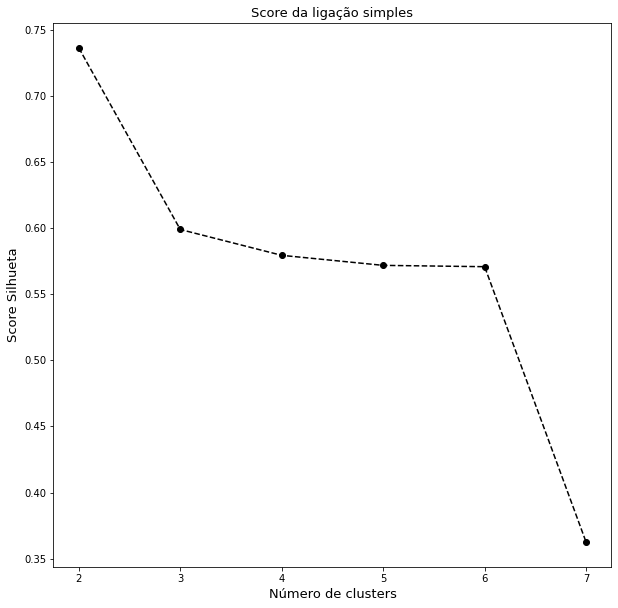

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
plot_sil_score(n_clust,sc,'Score da ligação simples','Número de clusters')

- Exibe o dendrograma do modelo gerado, com n_cluster = 2

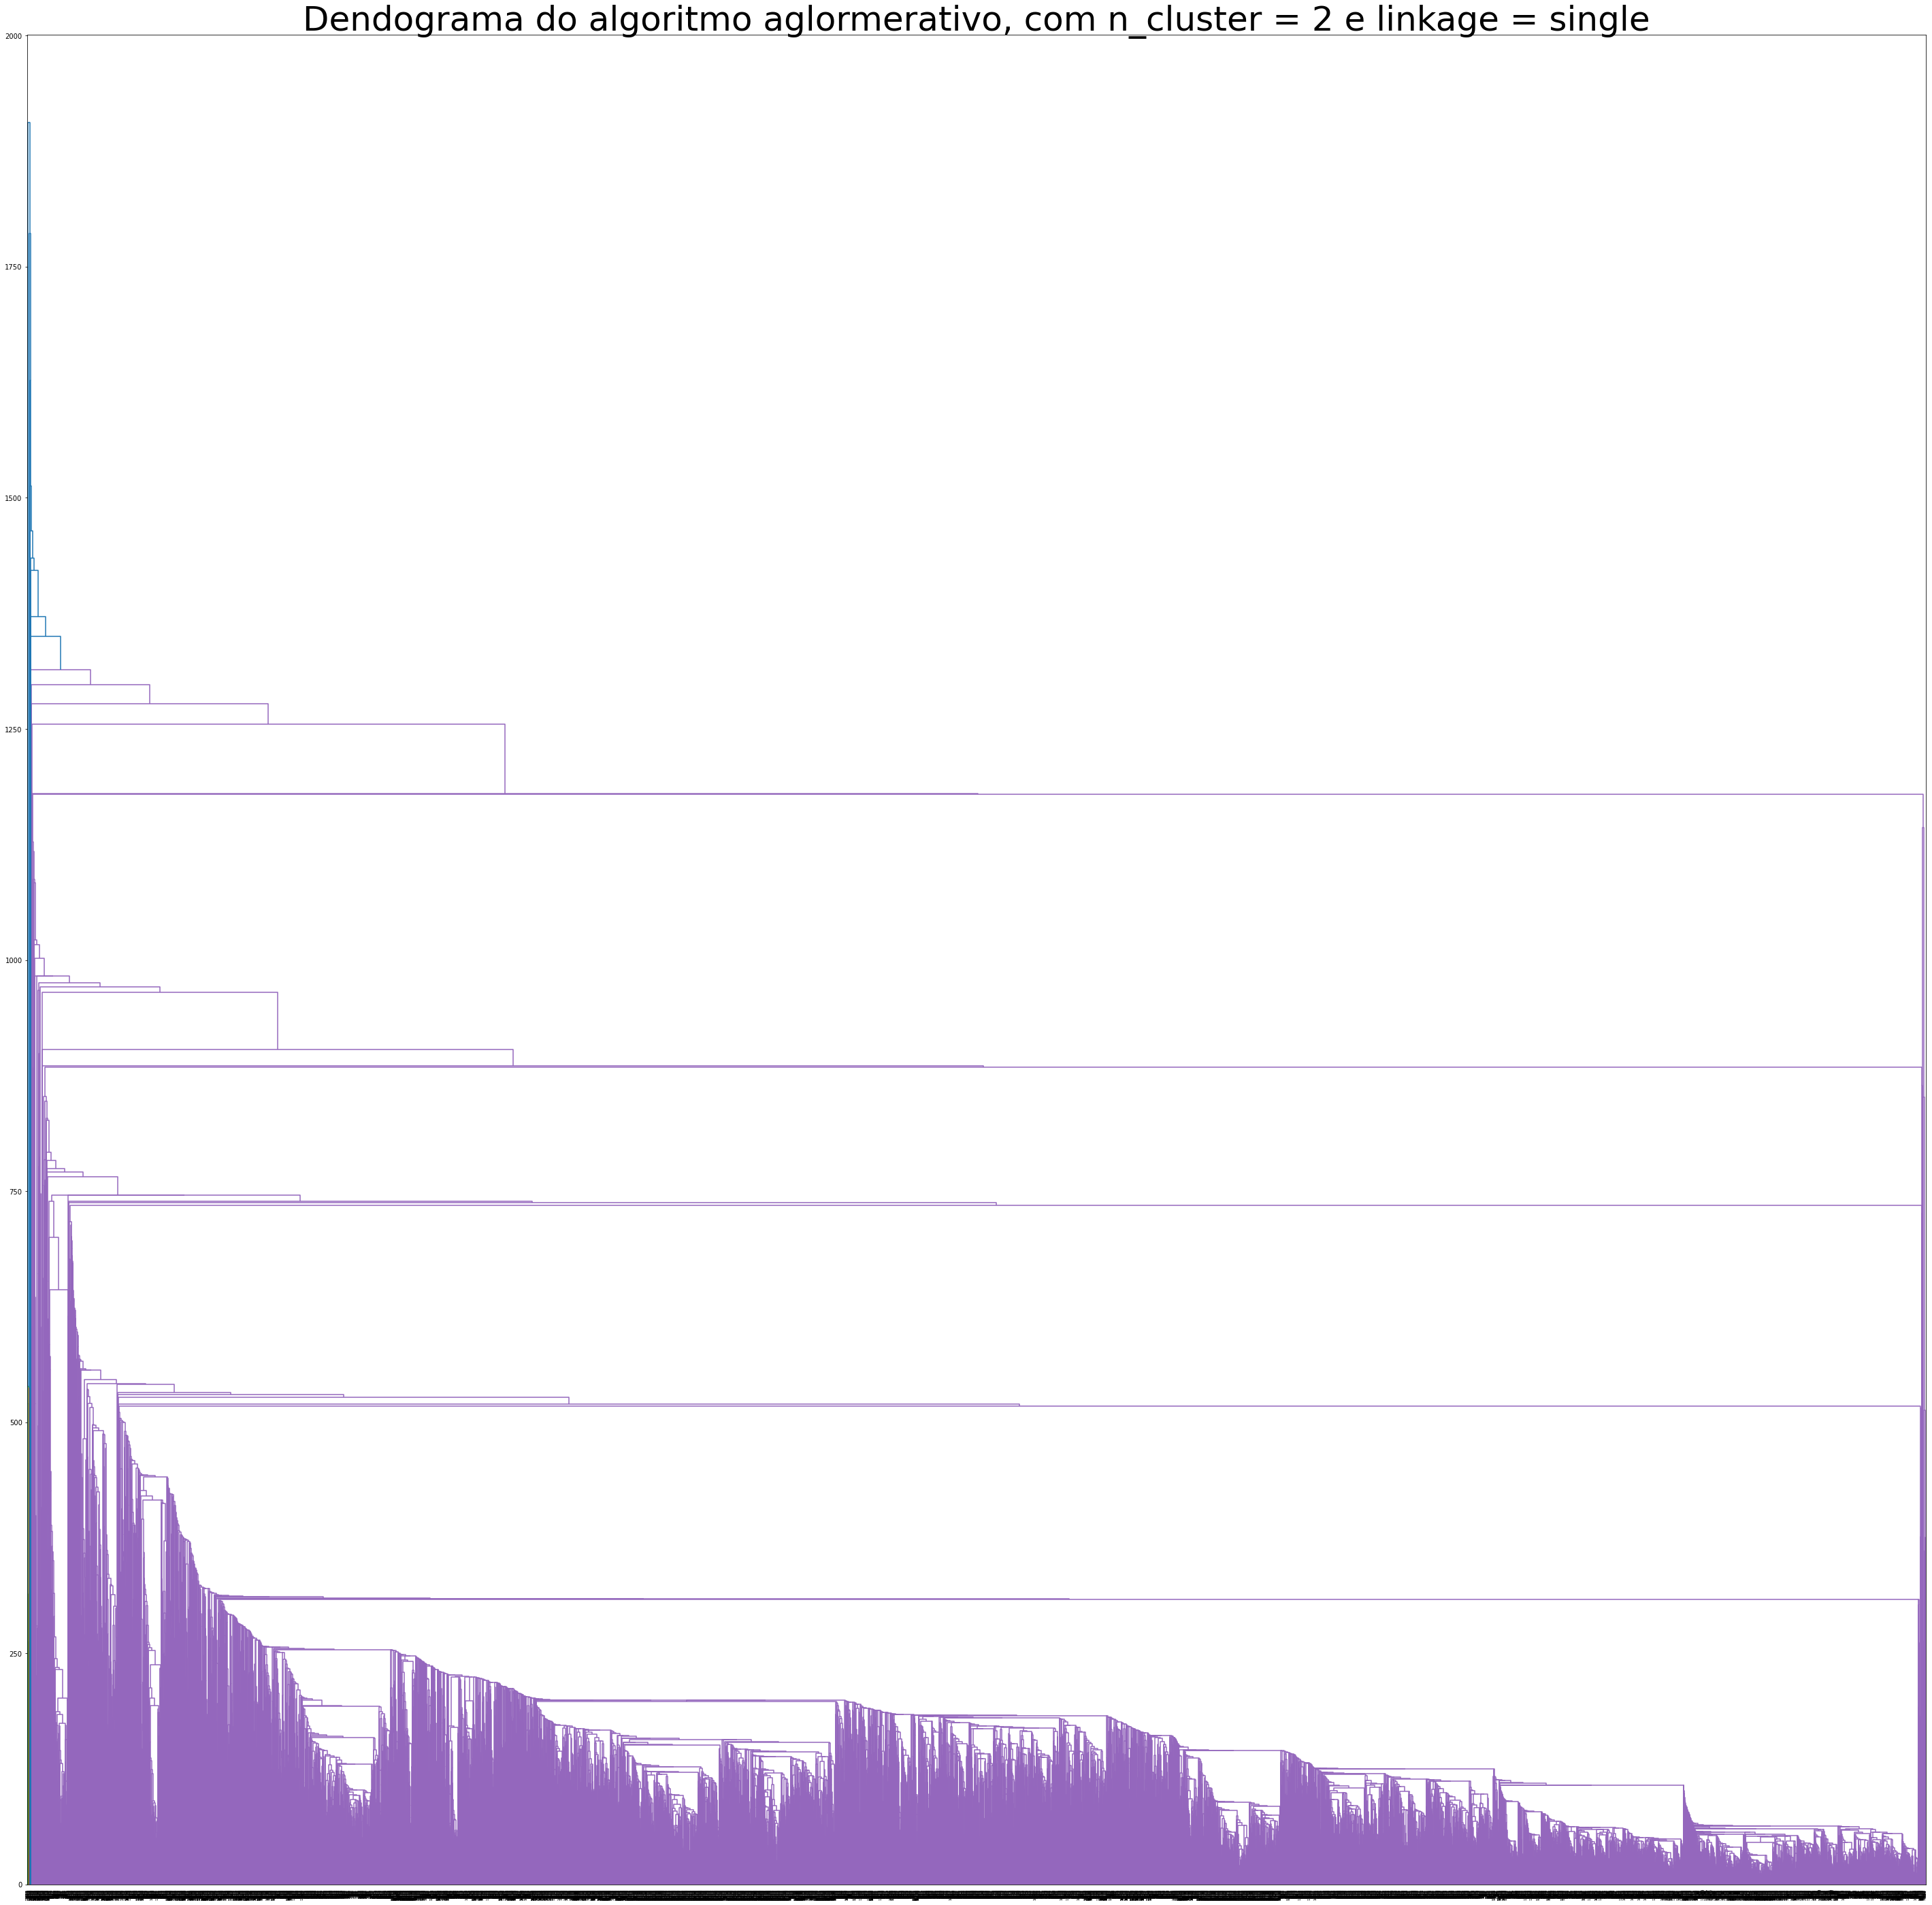

In [ ]:
plt.rcParams["figure.figsize"] = (50,50)
agg = AgglomerativeClustering(n_clusters=2,linkage=linkage[0],affinity='euclidean',compute_distances=True).fit(df)
plot_dendogram(agg,linkage[0])

### Ligação Completa

- A ligação completa é apropriada para lidar com grupos globulares
- São menos sensíveis a ruídos e outliers.
- Entretanto, acaba dividindo grupos grandes.

- Nessa etapa, o algoritmo aglomerativo será testado, variando o número de cluster e mantendo constante o tipo de ligação, que nesse caso é a completa
- Além disso, o índice de silhueta será calculado para cada configuração, para que haja uma comparação dos resultados

In [ ]:
sc2 = []
for i in n_clust:
  #Exibição do índice de silhueta do modelo
  agg2 = AgglomerativeClustering(n_clusters=i,linkage=linkage[1],affinity='euclidean',compute_distances=True)
  preds = agg2.fit_predict(df)
  score = silhouette_score(df, preds)
  sc2.append(score)
  print(f"Para n_clusters = {i} e linkage = {linkage[1]}, o valor do índice de silhueta é  {score}")

Para n_clusters = 2 e linkage = complete, o valor do índice de silhueta é  0.5218304146983482
Para n_clusters = 3 e linkage = complete, o valor do índice de silhueta é  0.5393264355729857
Para n_clusters = 4 e linkage = complete, o valor do índice de silhueta é  0.2838467110552494
Para n_clusters = 5 e linkage = complete, o valor do índice de silhueta é  0.2826057993310412
Para n_clusters = 6 e linkage = complete, o valor do índice de silhueta é  0.2726711969842969
Para n_clusters = 7 e linkage = complete, o valor do índice de silhueta é  0.22815112957760755


- Gráfico para ilustar o score do modelo 

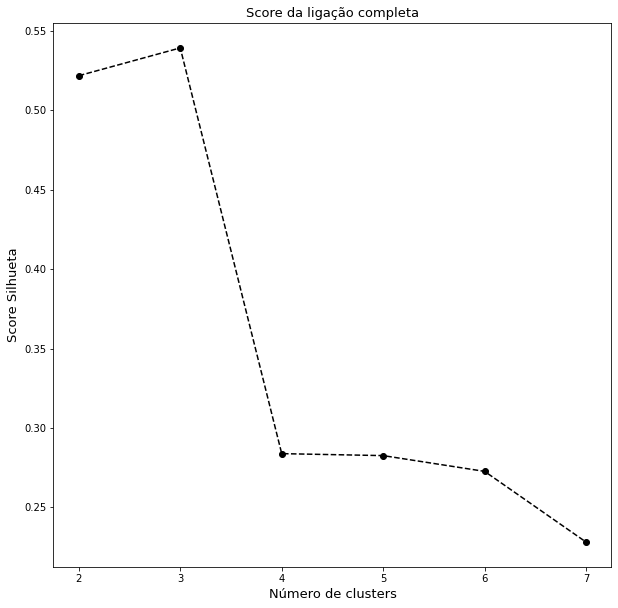

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
plot_sil_score(n_clust,sc2,'Score da ligação completa', 'Número de clusters')

- Exibe o dendrograma do modelo gerado, com n_cluster = 3

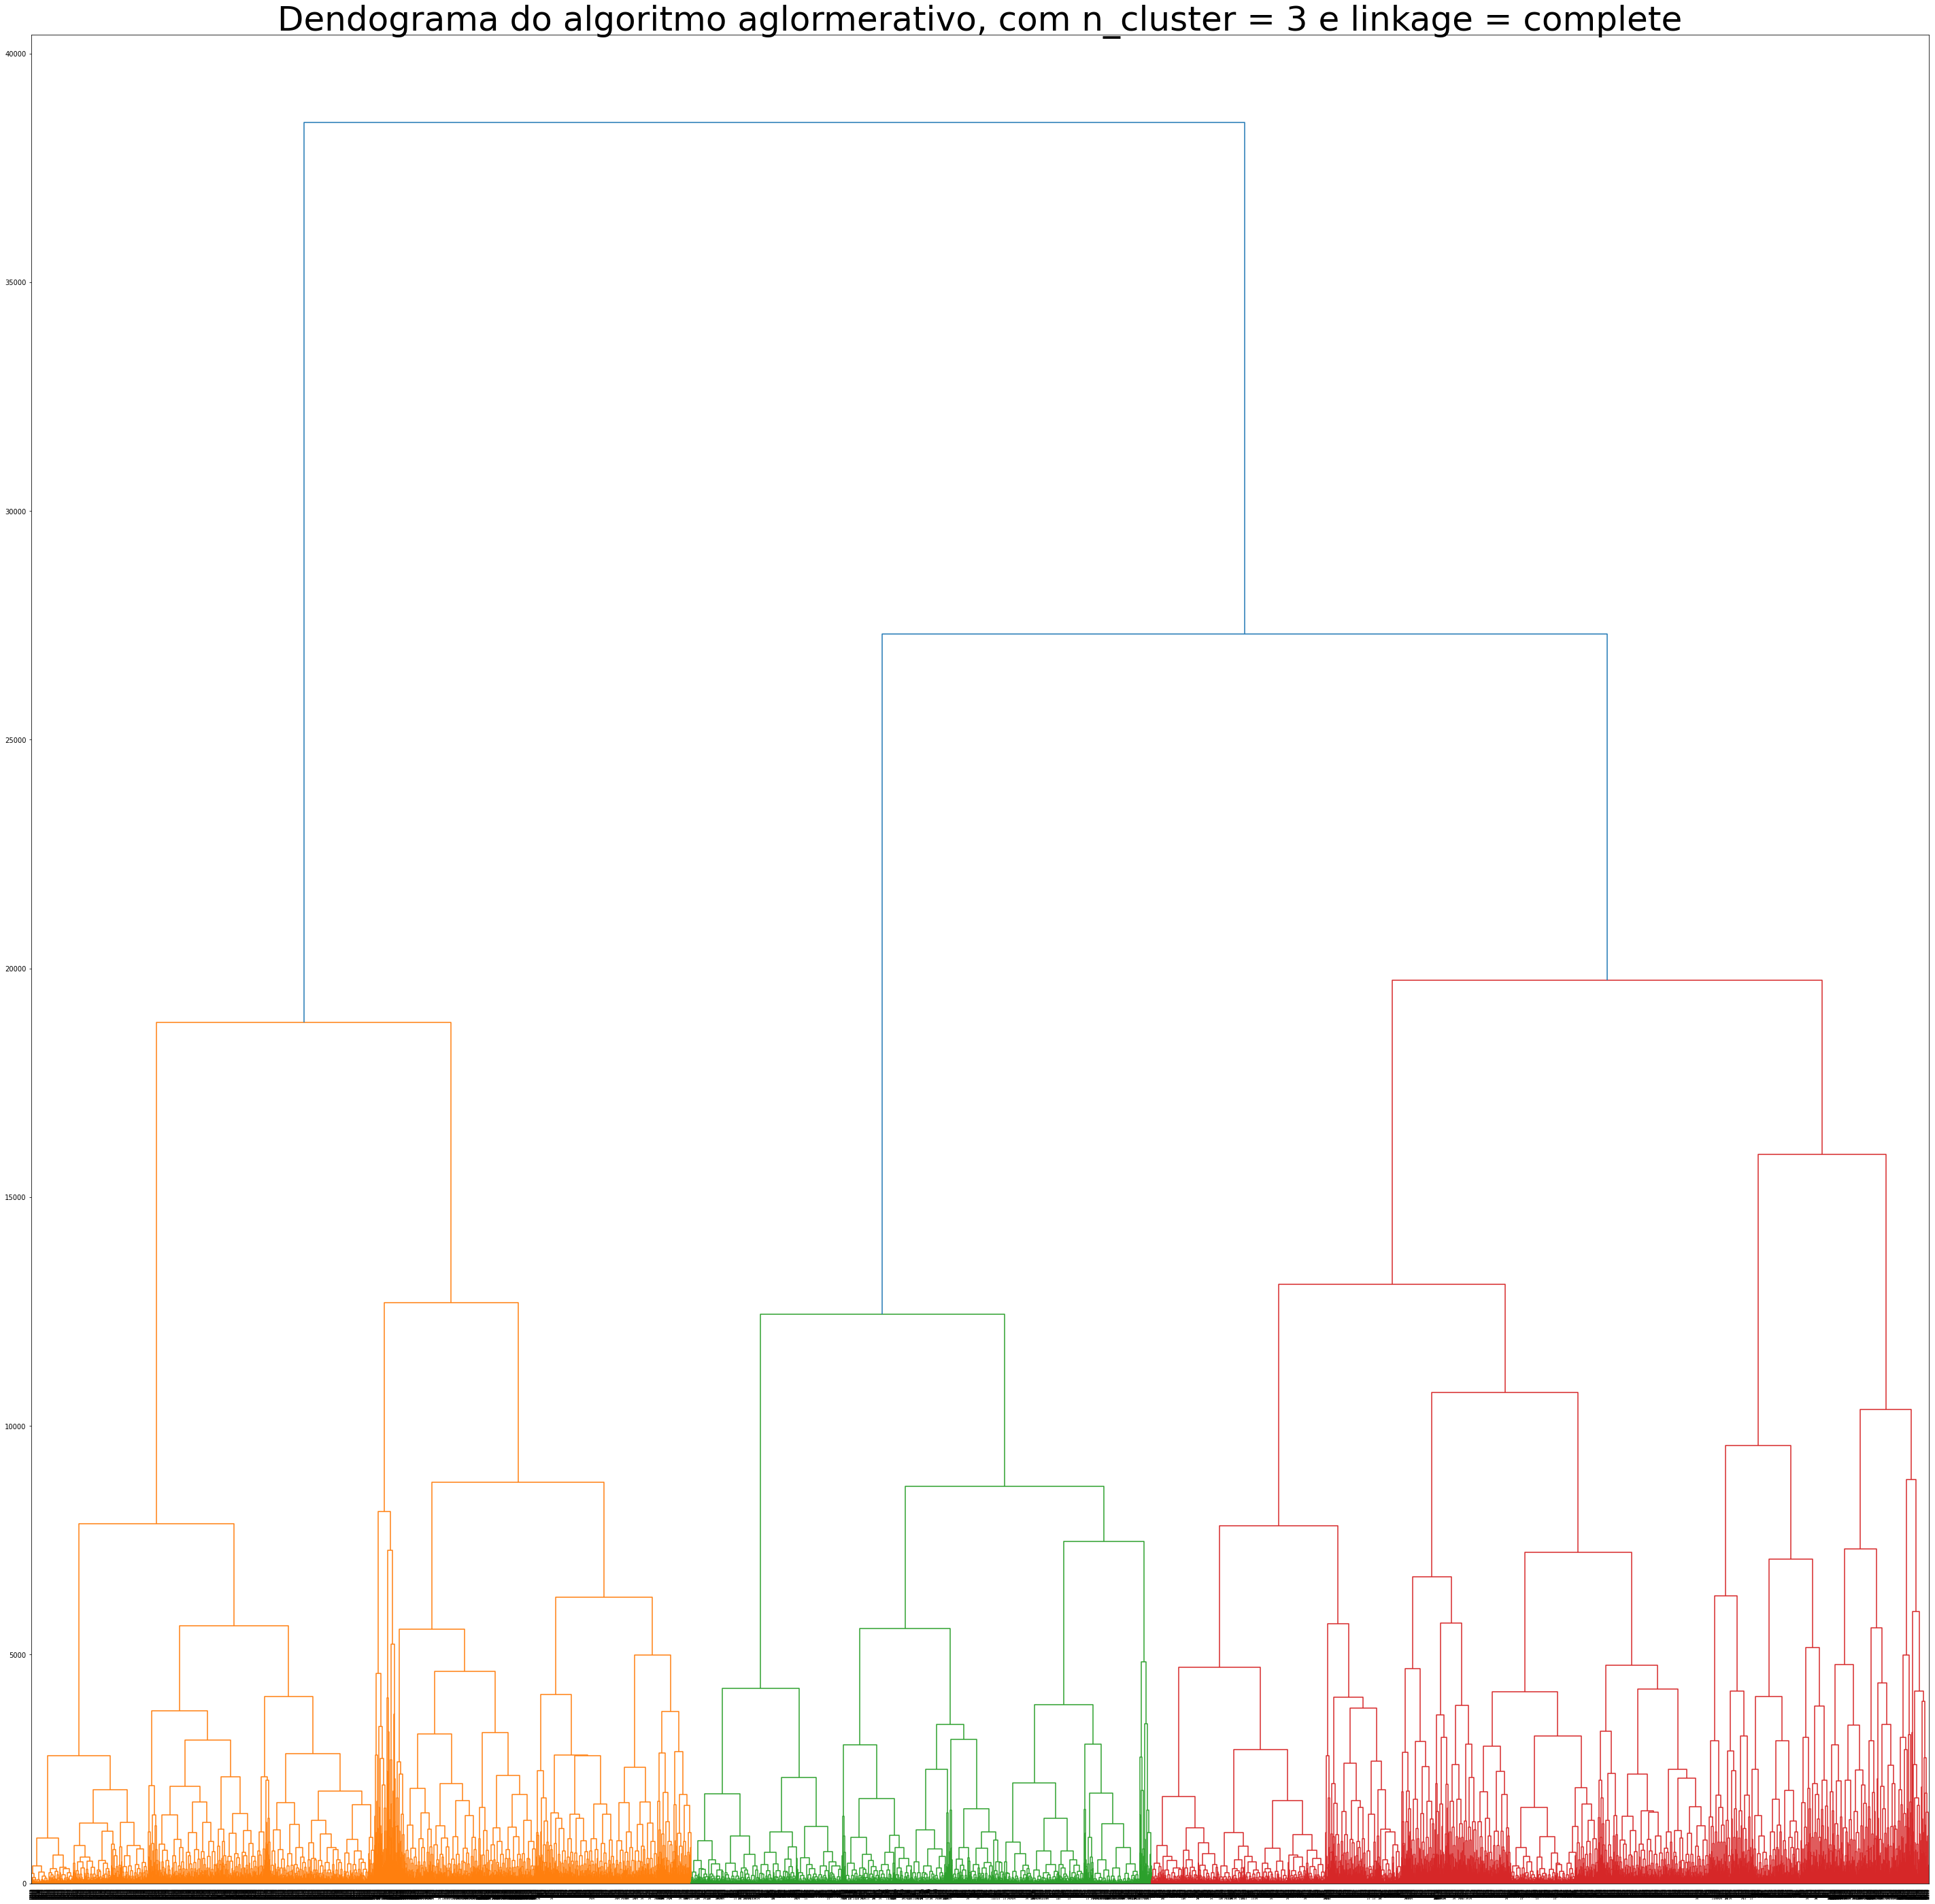

In [ ]:
agg2 = AgglomerativeClustering(n_clusters=3,linkage=linkage[1],affinity='euclidean',compute_distances=True).fit(df)
plot_dendogram(agg2,linkage[1])

### Ligação Média

- Calcula a média entre a distância de todos os objetos de dois grupos e por isso acaba tendo um resultado intermediário entre a Ligacação Completa e a Ligação Simples
- Além disso, não se tem mais a informação sobre os formatos do grupo e o algoritmo se torna não relacional

- Nessa etapa, o algoritmo aglomerativo será testado, variando o número de cluster e mantendo constante o tipo de ligação, que nesse caso é a média
- Além disso, o índice de silhueta será calculado para cada configuração, para que haja uma comparação dos resultados

In [ ]:
sc3 = []
for i in n_clust:
  #Exibição do índice de silhueta do modelo
  agg3 = AgglomerativeClustering(n_clusters=i,linkage=linkage[2],affinity='euclidean',compute_distances=True)
  preds = agg3.fit_predict(df)
  score = silhouette_score(df, preds)
  sc3.append(score)
  print(f"Para n_clusters = {i} e linkage = {linkage[2]}, o valor do índice de silhueta é  {score}")

Para n_clusters = 2 e linkage = average, o valor do índice de silhueta é  0.7361489910638382
Para n_clusters = 3 e linkage = average, o valor do índice de silhueta é  0.5673484106004716
Para n_clusters = 4 e linkage = average, o valor do índice de silhueta é  0.5410122118503444
Para n_clusters = 5 e linkage = average, o valor do índice de silhueta é  0.5393219688488846
Para n_clusters = 6 e linkage = average, o valor do índice de silhueta é  0.406337148439508
Para n_clusters = 7 e linkage = average, o valor do índice de silhueta é  0.40001561315938833


- Gráfico para ilustar o score do modelo 

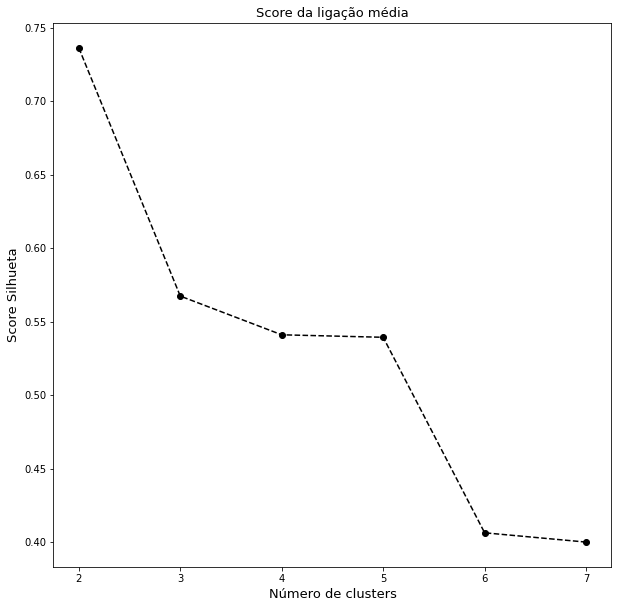

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
plot_sil_score(n_clust,sc3,'Score da ligação média', 'Número de clusters')

- Exibe o dendrograma do modelo gerado, com n_cluster = 2

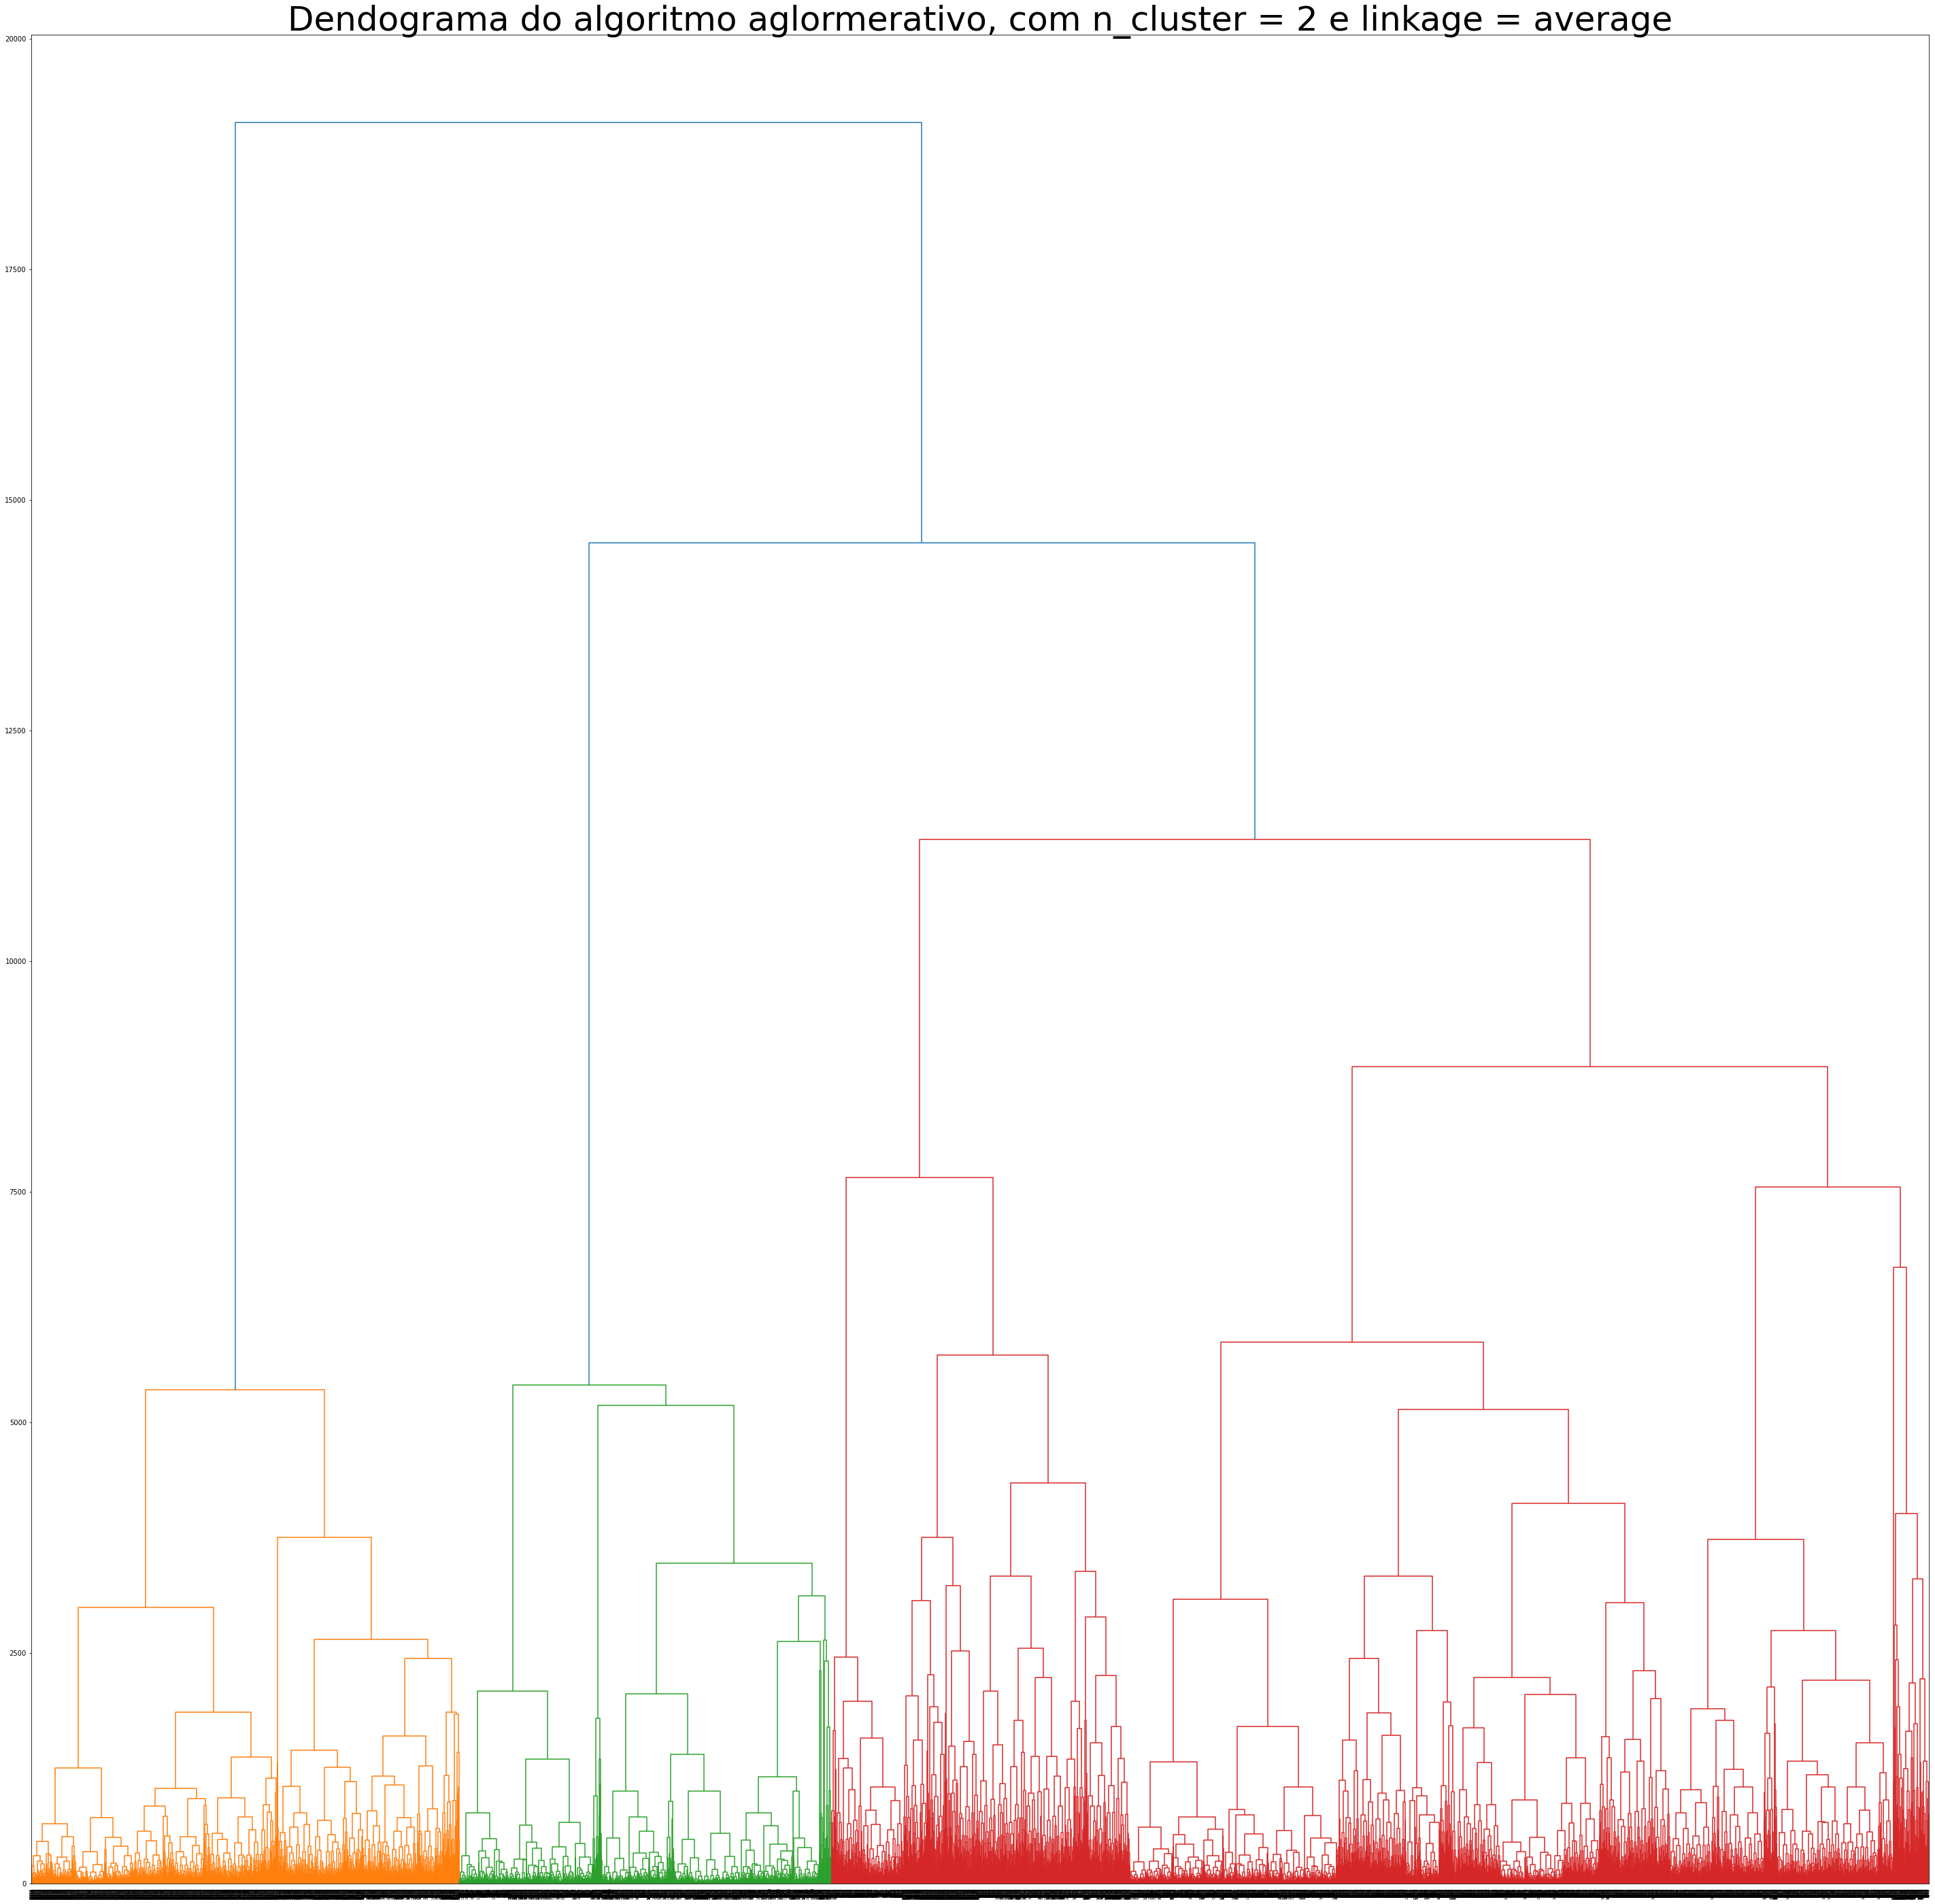

In [ ]:
agg = AgglomerativeClustering(n_clusters=2,linkage=linkage[2],affinity='euclidean',compute_distances=True).fit(df)
plot_dendogram(agg,linkage[2])

## Comparação dos resultados

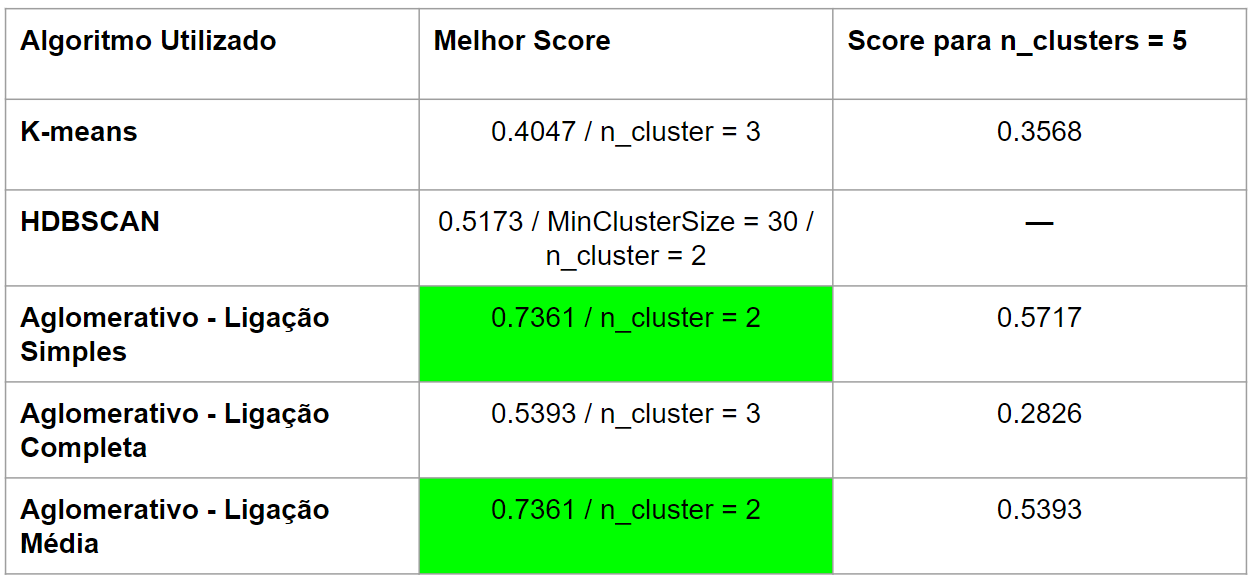

## Conclusão

Ao analisar a métrica de validação utilizada (índice de silhueta), o melhor método de agrupamento foi o Algoritmo Aglomerativo. Sendo que as medidas de ligação média e ligação simples empataram em 0.7361 com um total de 2 clusters.

Apesar do número de clusters escolhidos com o SSE do k-means ser 5, ele não teve um bom desempenho com a métrica da silhueta, pois o SSE só leva em consideração a distância intra-grupos do clusters formados, enquanto a silhueta leva em consideração a distância intra-grupos e a distância inter-grupos.

Como o HDBSCAN é um algoritmo que, além de baseado em densidade, é hierárquico, ele é muito poderoso.
Como visto no gráfico construído pelo método do PCA existia uma clara separação em 2 grupos. Um grupo pequeno e um grupo muito grande, com diversos pontos.
Isso é representado na árvore condensada gerada pelo modelo do HDBSCAN, em que há uma partição com poucos pontos e outra com vários pontos. Entretanto, no grupo com muitos pontos os sub-grupos que podem ser gerados não tiveram a densidade suficiente para conseguir gerar um novo grupo, e dessa forma não houve uma divisão do grupo grande, oque reflete no resultado do HDBSCAN, que mostra a presença de 2 grupos

O Algoritmo Aglomerativo com ligação simples é um método muito útil para encontrar grupos
baseados em densidade, ou seja, quando o conjunto de dados tem uma distribuição muito densa dos pontos, como o conjunto que está sendo estudado, ele consegue identificar melhor os grupos. Assim, o resultado do Algoritmo Aglomerativo com ligação simples é explicável, já que como este método é poderoso para identificar grupos densos, quando o número de clusters escolhido é 2 há uma maior densidade dos grupos, visto que há uma clara separação dos pontos do conjunto de dados analisado.


O Algoritmo Aglomerativo com ligação completa é um método que não é tão sensível a outliers mas que tende a quebrar grupos muito grandes, que é o caso do conjunto de dados estudado. Dessa forma, o resultado do Algoritmo Aglomerativo com ligação completa não obteve resultados tão bons quanto ao algoritmo configurado com outros parâmetros, pois este método quebra os grupos grandes em menores, o que explica o por que quando o número de clusters escolhido foi 2, o algoritmo não obteve o melhor desempenho..

 Algoritmo Aglomerativo com ligação média é um misto entre a ligação completa e a simples, sendo menos sucetível a ruídos e com mais tendência a identificar grupos mais densos. Assim, o resultado do Algoritmo Aglomerativo com ligação média é muito semelhante ao método da ligação simples, visto que a ligação média tem características da ligação simples, como por exemplo, a identificação de grupos densos, que é um atributo importante no conjunto de dados trabalhado.

Por fim, como nosso dataset se trata de diversas características de feijões é possível analisar que nossos dados podem ser divididos em 2 grupos de feijões que realmente se diferem em suas características, que foi o resultado que adotamos, pois mais divisões nesse grupo de acordo com nossos algoritmos, seriam possíveis, mas já acrescentaria sobreposições nos grupos e os feijões não teriam mais tantas diferenças e começariam a ser mais similares entre os grupos.
